In [1]:
from __future__ import print_function
import os
from matplotlib import pyplot as plt
%matplotlib inline
data_path = ['C:\\Users\Yash\\CMPS 367 SP19']
filepath_seq = os.sep.join(data_path + ['pdb_data_seq.csv'])
filepath_no_dup = os.sep.join(data_path + ['pdb_data_no_dups.csv'])
print(filepath_seq)
print(filepath_no_dup)

#imports
import numpy as np 
import timeit
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.utils.multiclass import unique_labels

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Activation, Flatten
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

import pandas as pd
import seaborn as sn
sn.set(font_scale=1.7)

#merge both datasets
df = pd.read_csv(filepath_no_dup)
df_seq = pd.read_csv(filepath_seq)
df = pd.merge(df, df_seq, how='inner', on='structureId')
df = df.drop([ 'structureId','experimentalTechnique', 'resolution', 
         'crystallizationMethod', 'crystallizationTempK', 'densityMatthews',
         'densityPercentSol', 'pdbxDetails', 'phValue','publicationYear' ]
        , axis=1)
#used columns with Protein only
df = df[df.macromoleculeType_x == 'Protein']
df.reset_index()


# Drop rows with missing labels
df = df[[type(c) == type('') for c in df.classification.values]]
df = df[[type(c) == type('') for c in df.sequence.values]]
df.dropna(inplace=True)
df_first = df
df_second = df

C:\Users\dryap\CMPS 367 SP19\pdb_data_seq.csv
C:\Users\dryap\CMPS 367 SP19\pdb_data_no_dups.csv


Using TensorFlow backend.


In [2]:
#count to see how many protein classes are above 2000
#get the most common classes for classification
from collections import Counter
cnt = Counter(df_first.classification)

cnt_2k = Counter({k: cnt for k, cnt in cnt.items() if cnt >= 2000})
print ('Most common:')
for classes, count in cnt_2k.most_common():
    print ('%s: %7d' % (classes, count))

# select the most common classes above 2000
top_classes = 29
tmp = np.array([[c[0], c[1]] for c in cnt.most_common()[:top_classes]])
[classes, counts] = tmp[:,0], tmp[:,1].astype(int)
df_first = df[[c in classes for c in df_first.classification]]

# Transform labels to one-hot
df_first.classification = pd.factorize(df_first.classification)[0]
y = df_first.classification 
cntrz = Counter(y)
print(y)

#tokenize the sequences of amino acids
max_length = 265
seqs = df_first.sequence.values
print(df_first.sequence.values.shape)
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(seqs)
X = tokenizer.texts_to_sequences(seqs)
df_first.sequence = sequence.pad_sequences(X, maxlen=max_length)
#print(df.sequence)

df_first.pop('classification')
df_first.pop('macromoleculeType_y')
df_first.pop('macromoleculeType_x')
df_first.pop('residueCount_y')
df_first.pop('chainId')
#print(X.shape)
#print(y.shape)
print(df_first)
#train test split
X_train, X_test,y_train,y_test = train_test_split(df_first, y, test_size = 0.2, random_state = 1)
print(X_train)
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

Most common:
HYDROLASE:   46336
TRANSFERASE:   36423
OXIDOREDUCTASE:   34321
IMMUNE SYSTEM:   15615
LYASE:   11682
HYDROLASE/HYDROLASE INHIBITOR:   11218
TRANSCRIPTION:    8919
VIRAL PROTEIN:    8495
TRANSPORT PROTEIN:    8371
VIRUS:    6971
SIGNALING PROTEIN:    6469
ISOMERASE:    6356
LIGASE:    4964
MEMBRANE PROTEIN:    4891
PROTEIN BINDING:    4884
STRUCTURAL PROTEIN:    4335
CHAPERONE:    4156
STRUCTURAL GENOMICS, UNKNOWN FUNCTION:    3548
SUGAR BINDING PROTEIN:    3474
DNA BINDING PROTEIN:    3199
PHOTOSYNTHESIS:    3139
ELECTRON TRANSPORT:    3047
TRANSFERASE/TRANSFERASE INHIBITOR:    3032
METAL BINDING PROTEIN:    3023
CELL ADHESION:    2999
UNKNOWN FUNCTION:    2842
PROTEIN TRANSPORT:    2674
TOXIN:    2626
CELL CYCLE:    2496


c:\users\dryap\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


40         0
41         0
67         1
68         1
74         2
75         2
76         1
77         1
78         1
79         1
80         3
81         3
107        2
108        2
114        0
115        0
144        0
145        0
180        3
181        3
198        4
246        3
247        3
277        1
280        1
284        3
285        3
313        3
314        3
357        3
          ..
470972     5
470973     5
470976     1
470977     1
470978     1
470979     1
470980    15
470998     8
470999     8
471000     1
471020     3
471021     3
471025     3
471028     1
471029     1
471030     6
471031     6
471032     6
471033     6
471038     3
471039     3
471040     6
471041     6
471115    18
471118     3
471123     6
471124     6
471130     5
471131     5
471135     4
Name: classification, Length: 260505, dtype: int64
(260505,)
        residueCount_x  structureMolecularWeight  sequence
40                 418                  47830.70         0
41                 418      

Train time in seconds for that classifier:  189.2733042
0.8724784553079595
                                       precision    recall  f1-score   support

                            HYDROLASE      0.814     0.805     0.810       605
                          TRANSFERASE      0.864     0.881     0.873      9180
                       OXIDOREDUCTASE      0.870     0.826     0.847      1010
                        IMMUNE SYSTEM      0.869     0.881     0.875      7337
                                LYASE      0.802     0.851     0.826       616
        HYDROLASE/HYDROLASE INHIBITOR      0.913     0.933     0.923      6710
                        TRANSCRIPTION      0.928     0.901     0.914      2194
                        VIRAL PROTEIN      0.898     0.908     0.903      1720
                    TRANSPORT PROTEIN      0.860     0.865     0.862      1263
                                VIRUS      0.917     0.894     0.906      2378
                    SIGNALING PROTEIN      0.904     0.

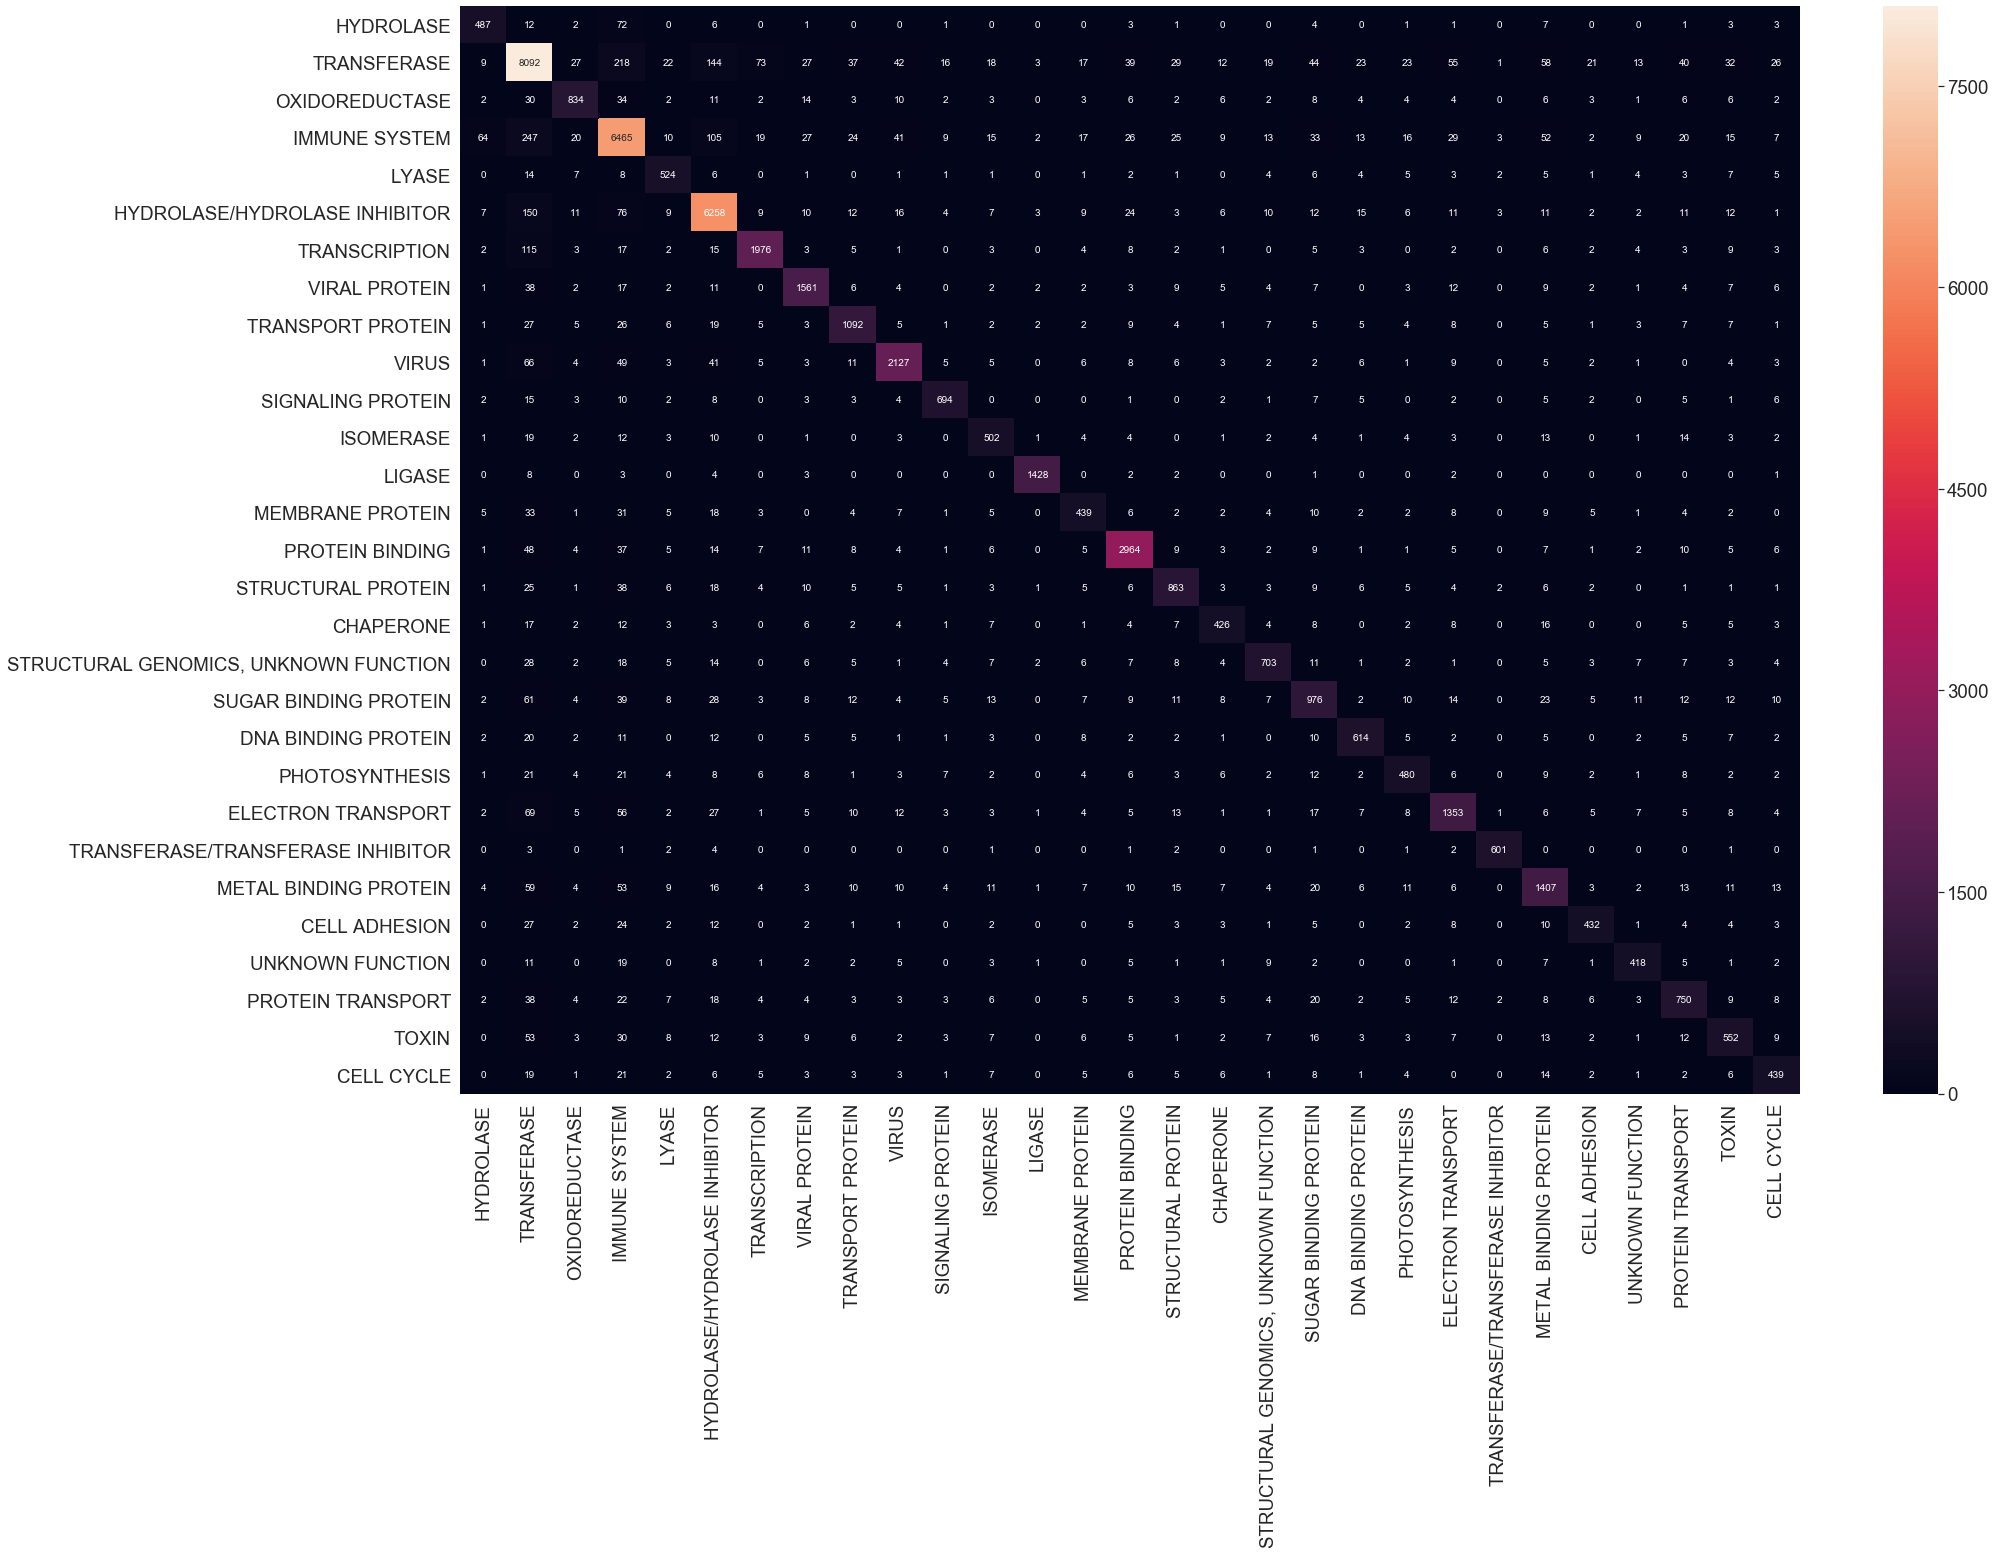

In [3]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
tic=timeit.default_timer()
classifier.fit(X_train, y_train)
toc=timeit.default_timer() - tic
print("Train time in seconds for that classifier: ",toc)
y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=classes, digits=3))

cm = confusion_matrix(y_test, y_pred)
classes = classes[unique_labels(y_train, y_pred)]
df_cm = pd.DataFrame(cm, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (30,20))
sn.heatmap(df_cm, annot=True, fmt = 'd')

Train time in seconds for that classifier:  2.3070988000000057
0.8648010594806241
                                       precision    recall  f1-score   support

                            HYDROLASE      0.765     0.797     0.781       605
                          TRANSFERASE      0.871     0.862     0.866      9180
                       OXIDOREDUCTASE      0.830     0.821     0.825      1010
                        IMMUNE SYSTEM      0.873     0.868     0.871      7337
                                LYASE      0.794     0.844     0.818       616
        HYDROLASE/HYDROLASE INHIBITOR      0.915     0.921     0.918      6710
                        TRANSCRIPTION      0.914     0.897     0.905      2194
                        VIRAL PROTEIN      0.883     0.909     0.895      1720
                    TRANSPORT PROTEIN      0.847     0.862     0.855      1263
                                VIRUS      0.905     0.888     0.896      2378
                    SIGNALING PROTEIN      0.877

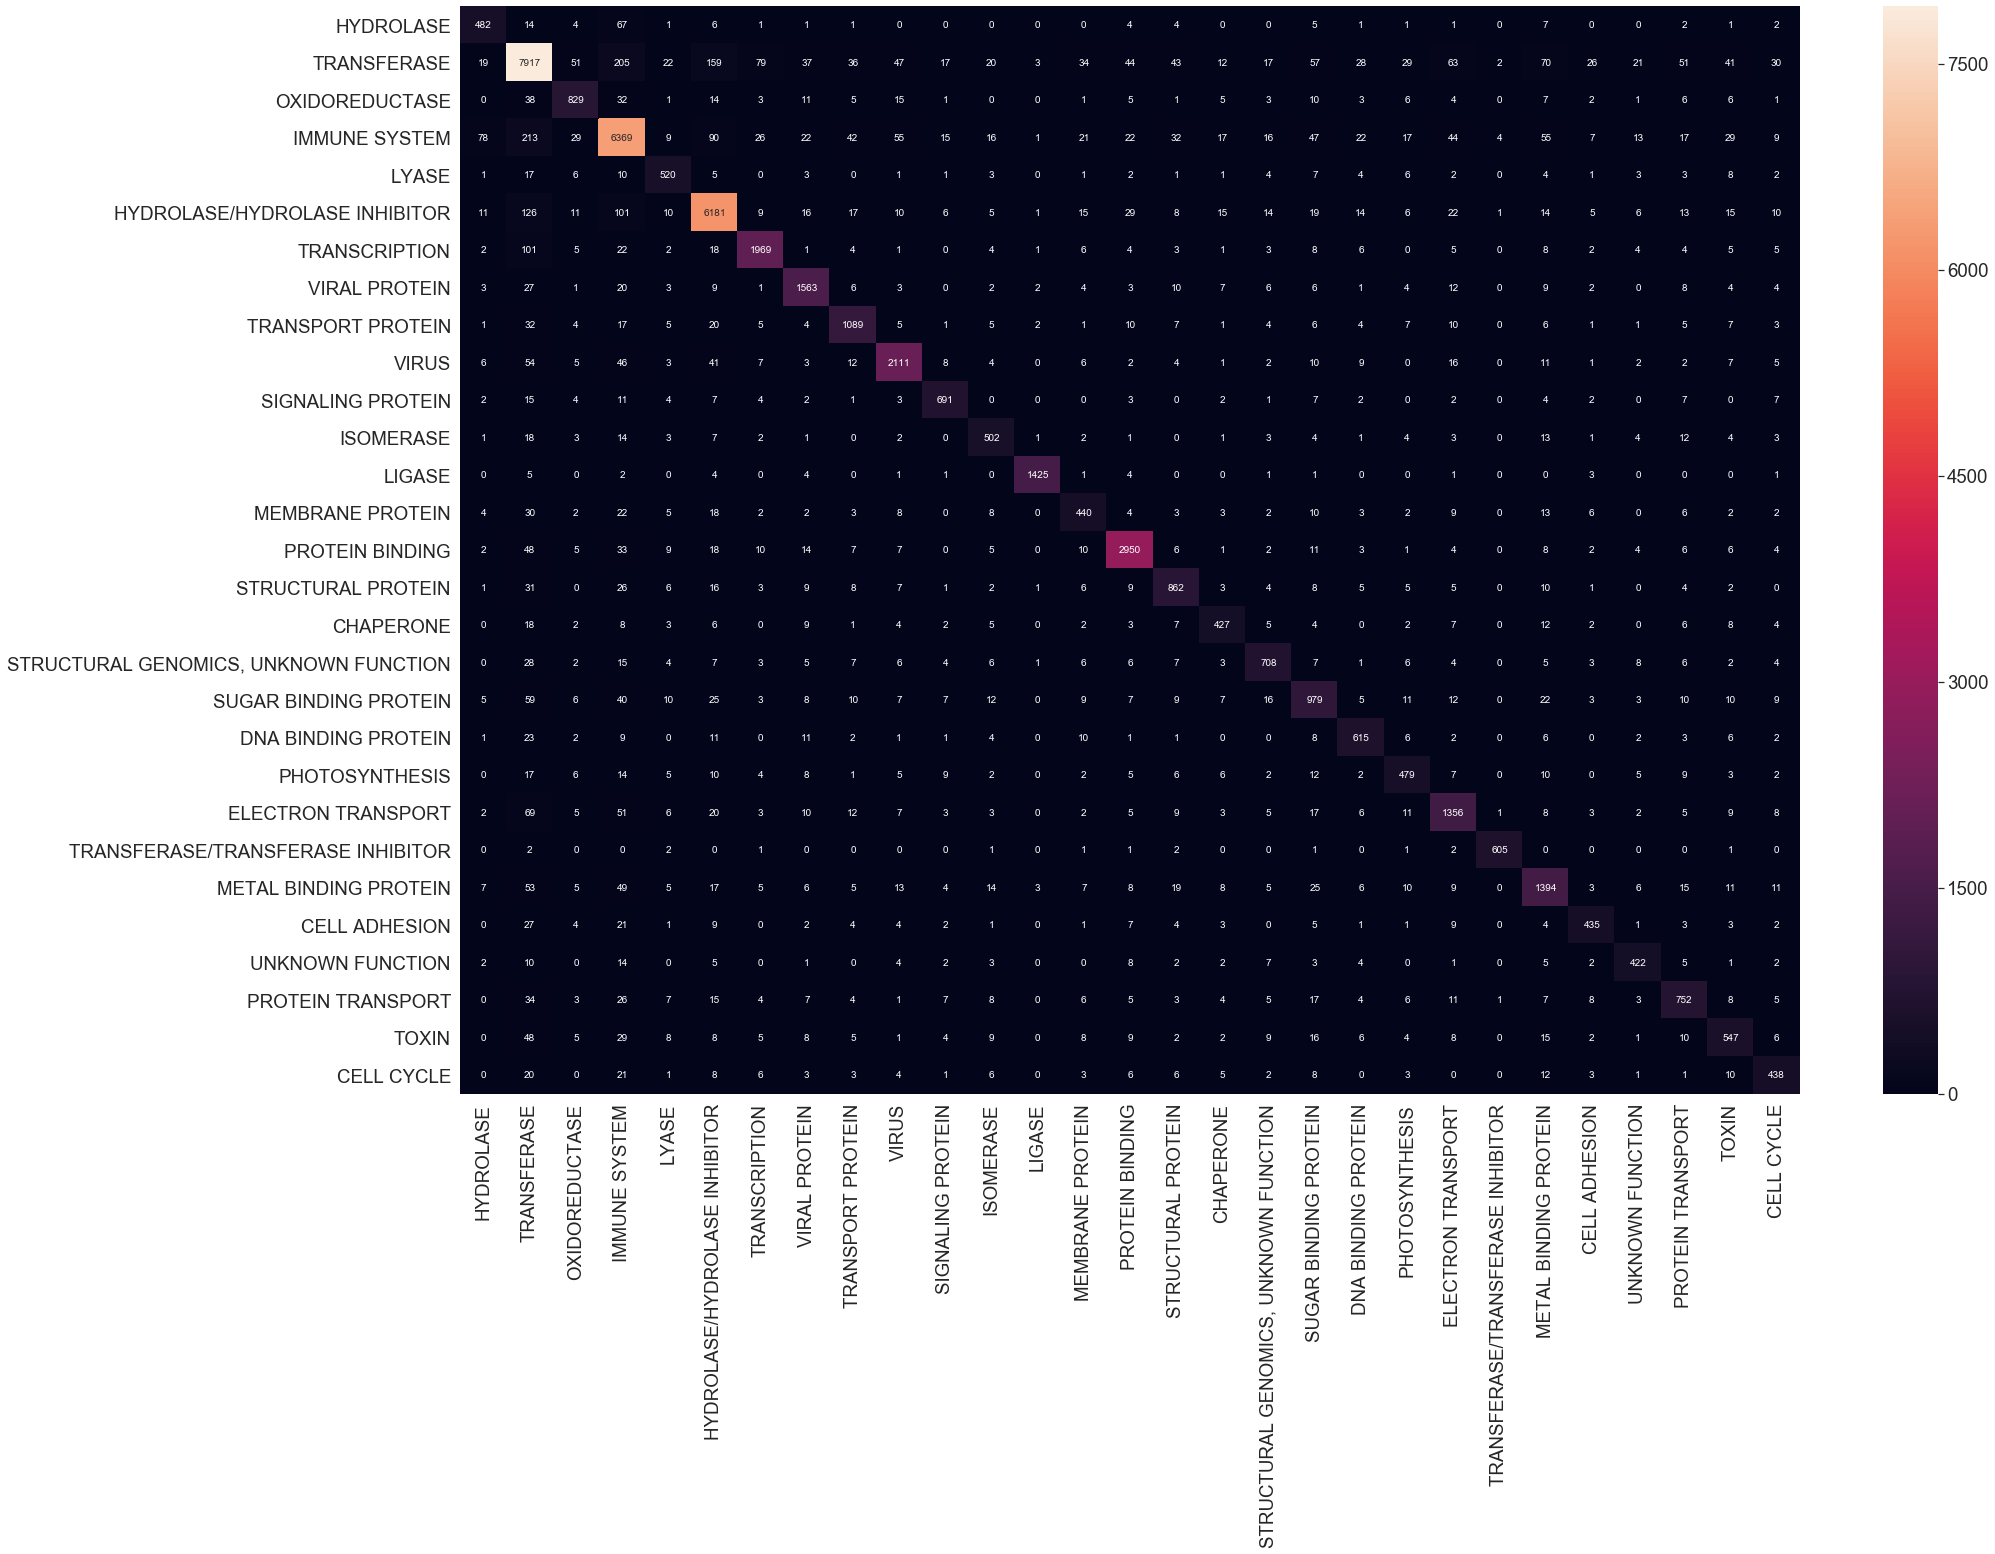

In [4]:
#DecisionTrees 
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state = 42)
tic=timeit.default_timer()
decision_tree.fit(X_train, y_train)
toc=timeit.default_timer() - tic
print("Train time in seconds for that classifier: ",toc)
y_pred_dt = decision_tree.predict(X_test)

print(accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, target_names=classes, digits=3))

cm = confusion_matrix(y_test, y_pred_dt)
classes = classes[unique_labels(y_train, y_pred_dt)]
df_cm = pd.DataFrame(cm, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (30,20))
sn.heatmap(df_cm, annot=True, fmt = 'd')

Train time in seconds for that classifier:  64.1590395
0.8749736089518435
                                       precision    recall  f1-score   support

                            HYDROLASE      0.798     0.818     0.808       605
                          TRANSFERASE      0.871     0.882     0.877      9180
                       OXIDOREDUCTASE      0.871     0.831     0.850      1010
                        IMMUNE SYSTEM      0.876     0.883     0.879      7337
                                LYASE      0.816     0.849     0.832       616
        HYDROLASE/HYDROLASE INHIBITOR      0.919     0.932     0.925      6710
                        TRANSCRIPTION      0.924     0.902     0.913      2194
                        VIRAL PROTEIN      0.901     0.908     0.904      1720
                    TRANSPORT PROTEIN      0.868     0.867     0.868      1263
                                VIRUS      0.914     0.903     0.908      2378
                    SIGNALING PROTEIN      0.881     0.8

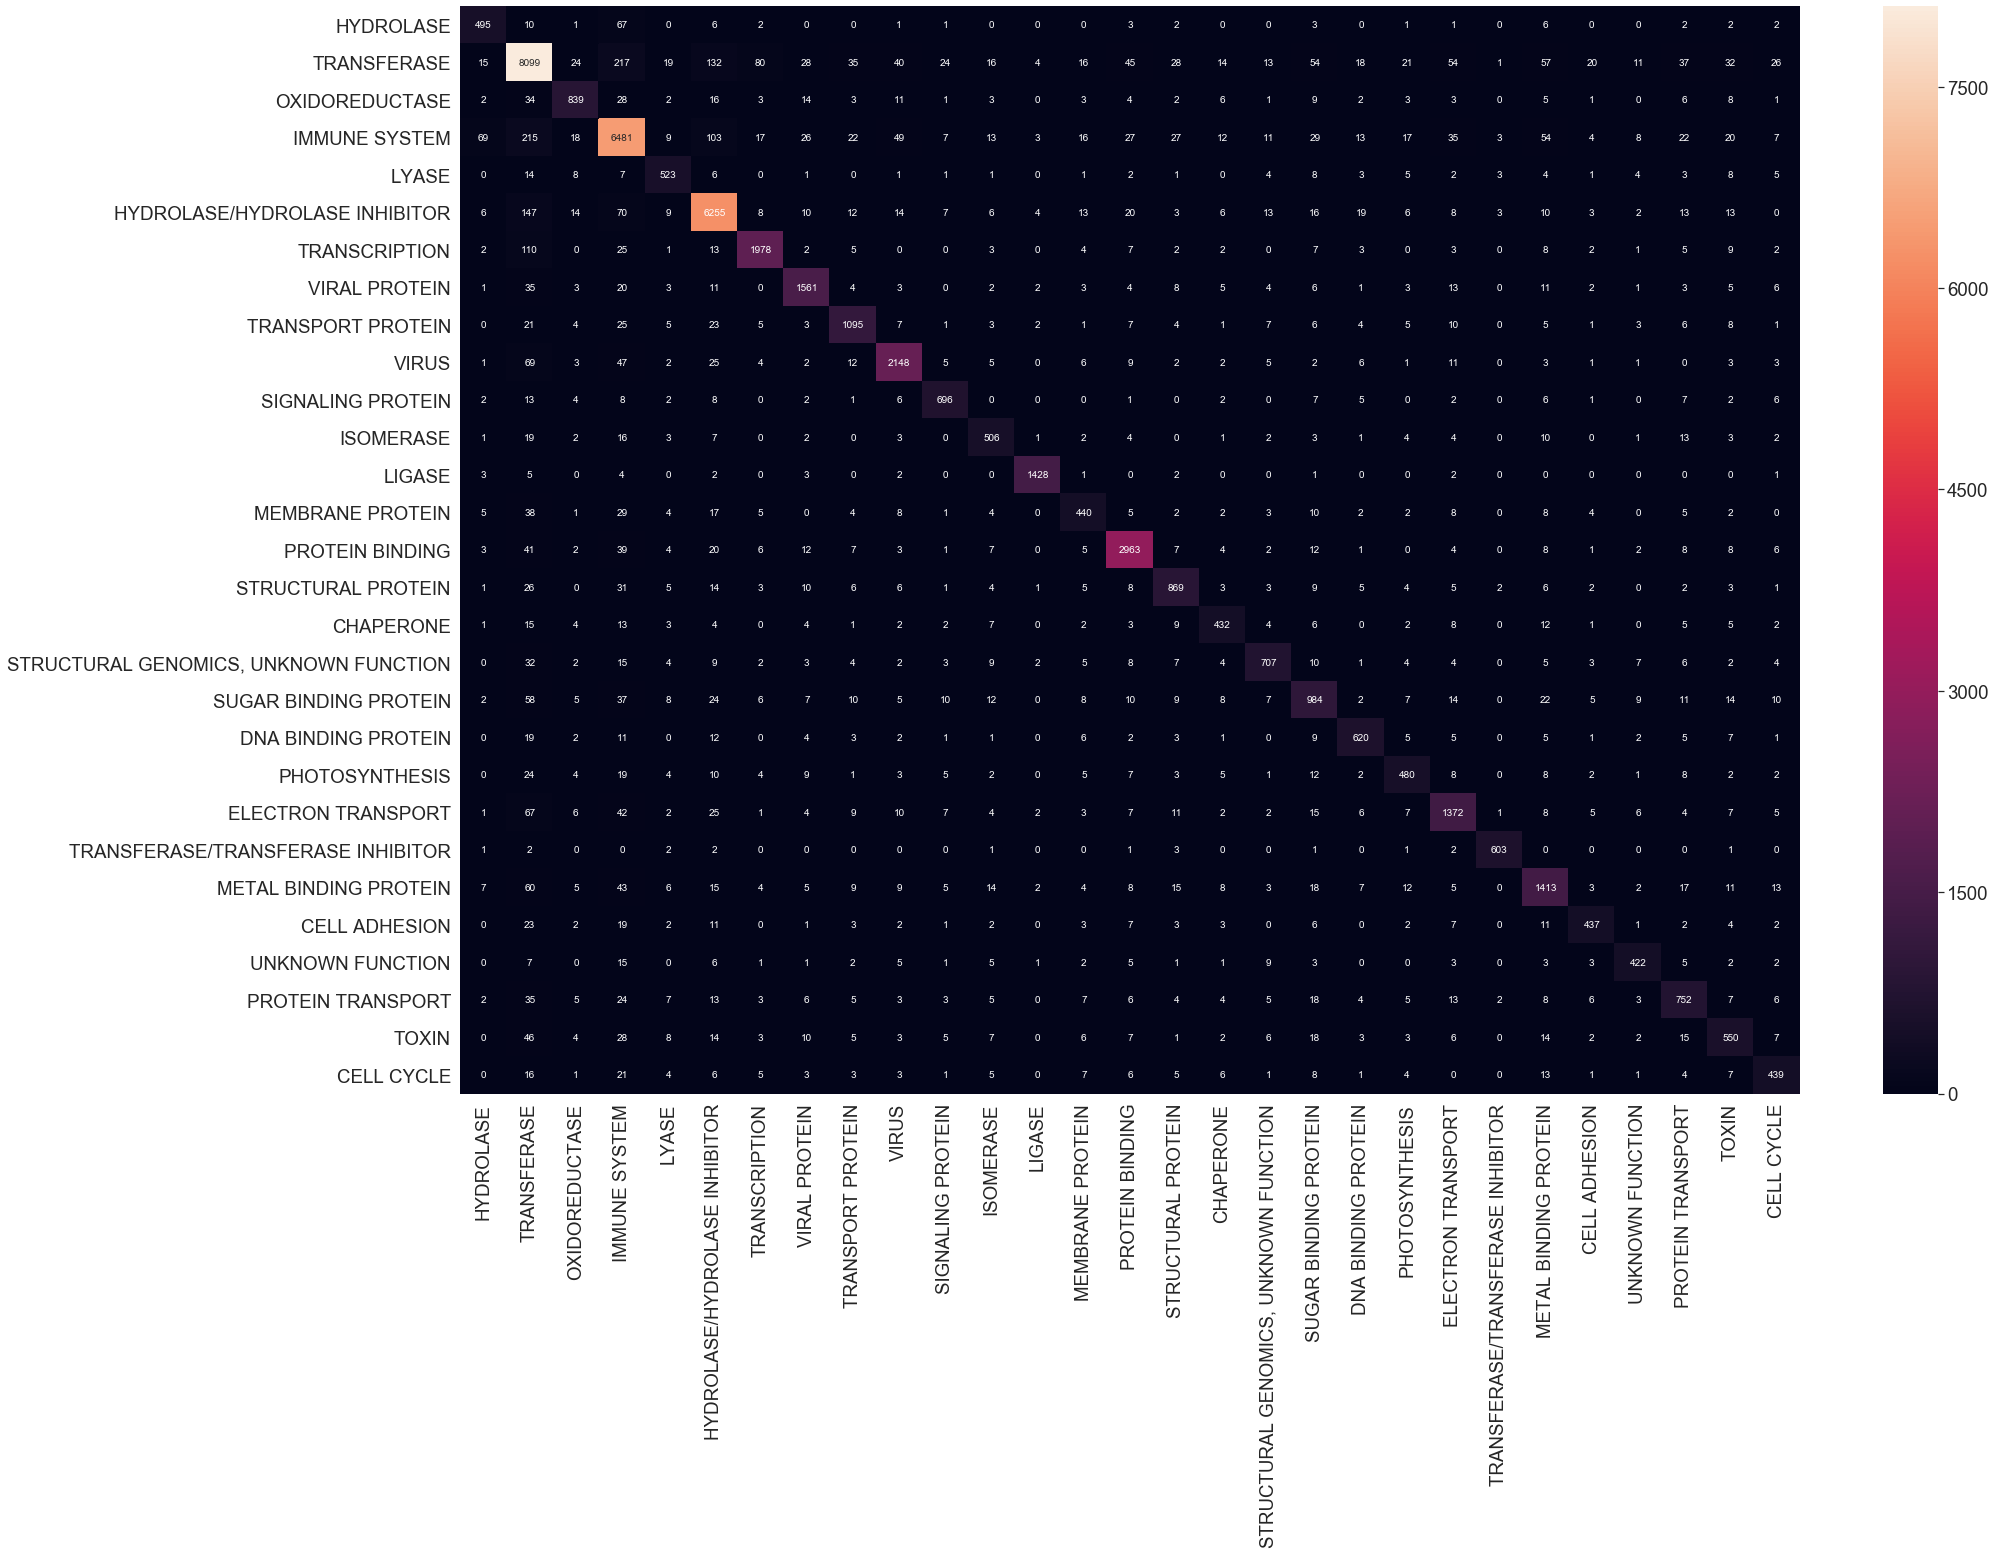

In [5]:
#ExtraTrees Classifier
from sklearn.ensemble import ExtraTreesClassifier
extra_trees = ExtraTreesClassifier(n_estimators=100)
tic=timeit.default_timer()
extra_trees.fit(X_train, y_train)
toc=timeit.default_timer() - tic
print("Train time in seconds for that classifier: ",toc)
y_pred_et = extra_trees.predict(X_test)

print(accuracy_score(y_test, y_pred_et))
print(classification_report(y_test, y_pred_et, target_names=classes, digits=3))

cm = confusion_matrix(y_test, y_pred_et)
classes = classes[unique_labels(y_train, y_pred_et)]
df_cm = pd.DataFrame(cm, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (30,20))
sn.heatmap(df_cm, annot=True, fmt = 'd')

Most common:
HYDROLASE:   46336
TRANSFERASE:   36423
OXIDOREDUCTASE:   34321
IMMUNE SYSTEM:   15615
LYASE:   11682
HYDROLASE/HYDROLASE INHIBITOR:   11218
TRANSCRIPTION:    8919
VIRAL PROTEIN:    8495
TRANSPORT PROTEIN:    8371
VIRUS:    6971
SIGNALING PROTEIN:    6469
ISOMERASE:    6356
LIGASE:    4964
MEMBRANE PROTEIN:    4891
PROTEIN BINDING:    4884
STRUCTURAL PROTEIN:    4335
CHAPERONE:    4156
STRUCTURAL GENOMICS, UNKNOWN FUNCTION:    3548
SUGAR BINDING PROTEIN:    3474
DNA BINDING PROTEIN:    3199
PHOTOSYNTHESIS:    3139
ELECTRON TRANSPORT:    3047
TRANSFERASE/TRANSFERASE INHIBITOR:    3032
METAL BINDING PROTEIN:    3023
CELL ADHESION:    2999
UNKNOWN FUNCTION:    2842
PROTEIN TRANSPORT:    2674
TOXIN:    2626
CELL CYCLE:    2496


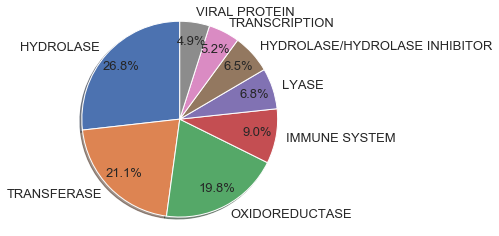

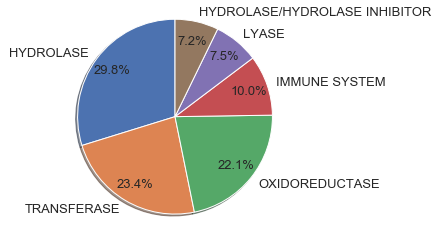

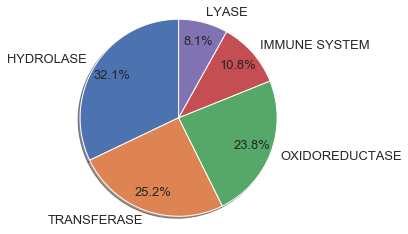

c:\users\dryap\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(144377,)
        residueCount_x  structureMolecularWeight  sequence
67                 572                  65203.21         7
68                 572                  65203.21         7
76                 248                  28700.28         0
77                 248                  28700.28         0
78                 248                  30391.41         0
79                 248                  30391.41         0
80                 420                  48366.94         0
81                 420                  48366.94         0
180                420                  47146.02         0
181                420                  47146.02         0
246                420                  47242.08         0
247                420                  47242.08         0
277                164                  18562.37         0
280                164                  18633.27         0
284                420                  48010.02         0
285                420                  48010.

In [6]:
#count to see how many protein classes are above 2000
#get the most common classes for classification
from collections import Counter
cnt = Counter(df_second.classification)
count_2k = Counter({k: cnt for k, cnt in cnt.items() if cnt >= 2000})
print ('Most common:')
for classes, count in count_2k.most_common():
    print ('%s: %7d' % (classes, count))

# select the 8 most common classes above 2000
top_classes = 8
tmp = np.array([[c[0], c[1]] for c in cnt.most_common()[:top_classes]])
[classes, counts] = tmp[:,0], tmp[:,1].astype(int)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=classes,autopct='%1.1f%%' ,
        shadow=True, startangle=90, pctdistance=.8,  textprops={'fontsize': 13})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# select the 6 most common classes above 2000
top_classes = 6
tmp = np.array([[c[0], c[1]] for c in cnt.most_common()[:top_classes]])
[classes, counts] = tmp[:,0], tmp[:,1].astype(int)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=classes,autopct='%1.1f%%' ,
        shadow=True, startangle=90, pctdistance=.8,  textprops={'fontsize': 13})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# select the 5 most common classes above 2000
top_classes = 5
tmp = np.array([[c[0], c[1]] for c in cnt.most_common()[:top_classes]])
[classes, counts] = tmp[:,0], tmp[:,1].astype(int)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=classes, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=.8,  textprops={'fontsize': 13})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

df_second = df[[c in classes for c in df_second.classification]]

# Transform labels to one-hot
df_second.classification = pd.factorize(df_second.classification)[0]
y = df_second.classification 
cntrz = Counter(y)

#tokenize the sequences of amino acids
max_length = 265
seqs = df_second.sequence.values
print(df_second.sequence.values.shape)
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(seqs)
X = tokenizer.texts_to_sequences(seqs)
df_second.sequence = sequence.pad_sequences(X, maxlen=max_length)
#print(df.sequence)

df_second.pop('classification')
df_second.pop('macromoleculeType_y')
df_second.pop('macromoleculeType_x')
df_second.pop('residueCount_y')
df_second.pop('chainId')

print(df_second)

#train test split
X_train, X_test,y_train,y_test = train_test_split(df_second, y, test_size = 0.2, random_state = 1)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)
print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

Train time in seconds for that classifier:  47.0949602
0.9272752458789306
                precision    recall  f1-score   support

     HYDROLASE      0.917     0.925     0.921      9213
   TRANSFERASE      0.910     0.918     0.914      7299
OXIDOREDUCTASE      0.939     0.942     0.940      6829
 IMMUNE SYSTEM      0.951     0.910     0.930      2347
         LYASE      0.954     0.937     0.946      3188

      accuracy                          0.927     28876
     macro avg      0.934     0.926     0.930     28876
  weighted avg      0.927     0.927     0.927     28876

   Number of Classes  Accuracy (%)
0                 29          87.2
1                 10          91.3
2                  8          91.7
3                  6          92.6
4                  5          92.7


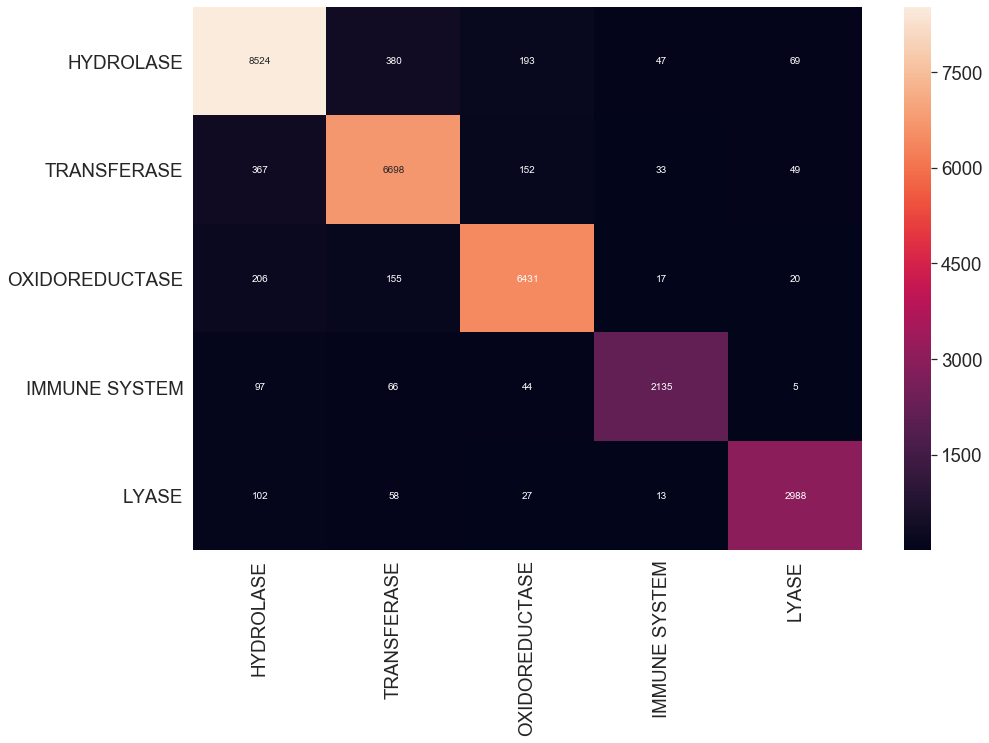

In [7]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
tic=timeit.default_timer()
classifier.fit(X_train, y_train)
toc=timeit.default_timer() - tic
print("Train time in seconds for that classifier: ",toc)
y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=classes, digits=3))

cm = confusion_matrix(y_test, y_pred)
classes = classes[unique_labels(y_train, y_pred)]
df_cm = pd.DataFrame(cm, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (15,10))
sn.heatmap(df_cm, annot=True, fmt = 'd')

#table of accuracy of different classes
t_rForest = pd.DataFrame({'Number of Classes': [29, 10, 8, 6, 5], 
      'Accuracy (%)': [87.2, 91.3, 91.7, 92.6, 92.7]}) 

print (t_rForest)

Train time in seconds for that classifier:  0.8092501000000425
0.9161933785842915
                precision    recall  f1-score   support

     HYDROLASE      0.912     0.911     0.912      9213
   TRANSFERASE      0.906     0.901     0.903      7299
OXIDOREDUCTASE      0.924     0.935     0.929      6829
 IMMUNE SYSTEM      0.909     0.907     0.908      2347
         LYASE      0.940     0.934     0.937      3188

      accuracy                          0.916     28876
     macro avg      0.918     0.917     0.918     28876
  weighted avg      0.916     0.916     0.916     28876

   Number of Classes  Accuracy (%)
0                 29          86.5
1                 10          90.1
2                  8          90.7
3                  6          91.5
4                  5          91.6


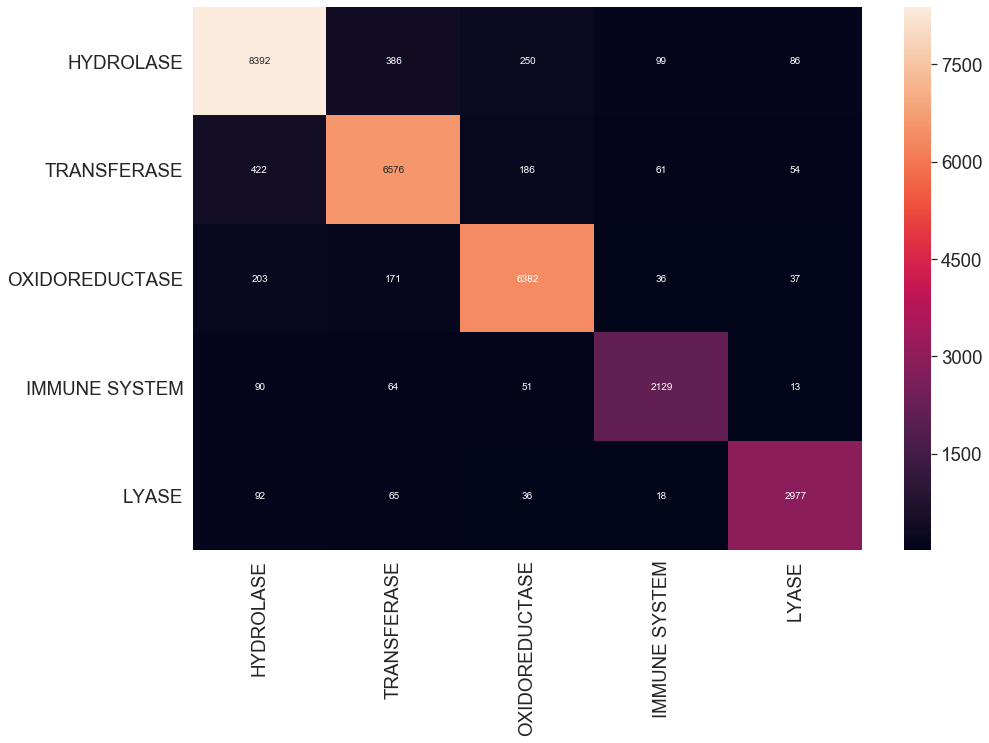

In [8]:
#DecisionTrees 
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state = 42)
tic=timeit.default_timer()
decision_tree.fit(X_train, y_train)
toc=timeit.default_timer() - tic
print("Train time in seconds for that classifier: ",toc)
y_pred_dt = decision_tree.predict(X_test)

print(accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, target_names=classes, digits=3))

cm = confusion_matrix(y_test, y_pred_dt)
classes = classes[unique_labels(y_train, y_pred_dt)]
df_cm = pd.DataFrame(cm, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (15,10))
sn.heatmap(df_cm, annot=True, fmt = 'd')

#table of accuracy of different classes
t_dForest = pd.DataFrame({'Number of Classes': [29, 10, 8, 6, 5], 
      'Accuracy (%)': [86.5, 90.1, 90.7, 91.5, 91.6]}) 

print (t_dForest)

Train time in seconds for that classifier:  21.450876300000004
0.9294569885025626
                precision    recall  f1-score   support

     HYDROLASE      0.921     0.929     0.925      9213
   TRANSFERASE      0.916     0.918     0.917      7299
OXIDOREDUCTASE      0.937     0.943     0.940      6829
 IMMUNE SYSTEM      0.945     0.918     0.931      2347
         LYASE      0.957     0.937     0.947      3188

      accuracy                          0.929     28876
     macro avg      0.935     0.929     0.932     28876
  weighted avg      0.930     0.929     0.929     28876

   Number of Classes  Accuracy (%)
0                 29          87.5
1                 10          91.6
2                  8          91.9
3                  6          92.7
4                  5          92.9


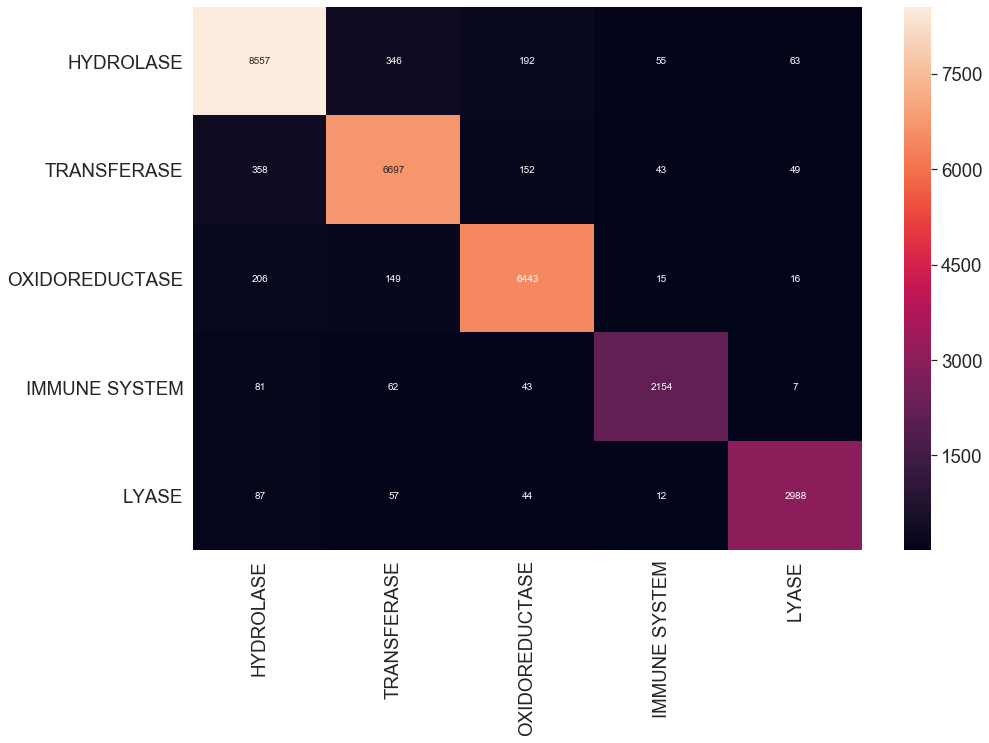

In [9]:
#ExtraTrees Classifier
from sklearn.ensemble import ExtraTreesClassifier
extra_trees = ExtraTreesClassifier(n_estimators=100)
tic=timeit.default_timer()
extra_trees.fit(X_train, y_train)
toc=timeit.default_timer() - tic
print("Train time in seconds for that classifier: ",toc)
y_pred_et = extra_trees.predict(X_test)

print(accuracy_score(y_test, y_pred_et))
print(classification_report(y_test, y_pred_et, target_names=classes, digits=3))

cm = confusion_matrix(y_test, y_pred_et)
classes = classes[unique_labels(y_train, y_pred_et)]
df_cm = pd.DataFrame(cm, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (15,10))
sn.heatmap(df_cm, annot=True, fmt = 'd')

#table of Accuracy of different classes

t_extraTrees = pd.DataFrame({'Number of Classes': [29, 10, 8, 6, 5], 
      'Accuracy (%)': [87.5, 91.6, 91.9, 92.7, 92.9]}) 

print (t_extraTrees)

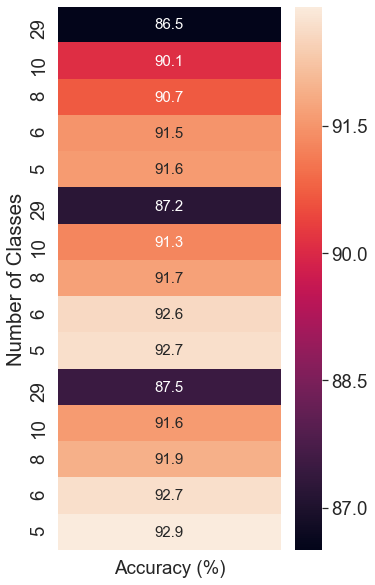

In [10]:
#accuracy heatmap

df = t_dForest.set_index('Number of Classes')
ef = t_extraTrees.set_index('Number of Classes')
rf = t_rForest.set_index('Number of Classes')

frames = [df,rf,ef]
accuracy = pd.concat(frames, axis=0, join='outer')
plt.figure(figsize = (5,10))
sn.heatmap(accuracy, annot=True, fmt = 'g', annot_kws={"size": 15})
plt.show()